<a href="https://colab.research.google.com/github/sms25/Machine-Learning-Projects/blob/main/Anomalous_Sound_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display
import os


In [ ]:
#Walk through and join the data paths
for dirname, _, filenames in os.walk('/content/drive/MyDrive/MIMII/fan/id_00'):
  for filename in filenames:
    os.path.join(dirname, filename)

In [ ]:
#Load a sample data and check the sample rate
x, sample_rate = librosa.load(r'/content/drive/MyDrive/MIMII/fan/id_00/abnormal/00000034.wav')
print('Sample rate:', sample_rate)

Sample rate: 22050


In [ ]:
#Directory and Category assignment
DATADIR = '/content/drive/MyDrive/MIMII/fan/id_00'
CATEGORIES = ['abnormal','normal']

In [ ]:
#Display a sample anomalous sound
from IPython.display import Audio

print('Sample anomalous fan sound:')
Audio(x,rate=sample_rate)

Sample anomalous fan sound:


In [ ]:
#Display a sample normal fan sound
x1, sample_rate = librosa.load(r'/content/drive/MyDrive/MIMII/fan/id_00/normal/00000016.wav')
print('Sample normal fan sound:')
Audio(x1,rate=sample_rate)

Sample normal fan sound:


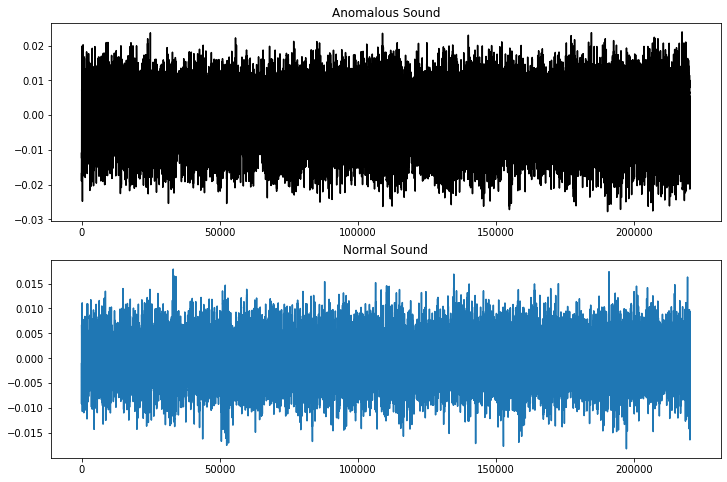

In [ ]:
#Plotting sample sounds
fig, axes = plt.subplots(2, figsize=(12,8))
axes[0].plot(x, 'black')
axes[0].set_title('Anomalous Sound')

axes[1].plot(x1)
axes[1].set_title('Normal Sound')
plt.show()

In [ ]:
#Preprocess the data
training_data = []
def process_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for audio in os.listdir(path):
      audio_array, sr_array = librosa.load(os.path.join(path, audio))
      audio_array = audio_array[1000:21000]
      training_data.append([audio_array, class_num])

process_training_data()

In [ ]:
#Check the length of training data
lenOfAudio = len(training_data)
print('Length of the dataset: ',lenOfAudio)

Length of the dataset:  1414


In [ ]:
#Split data, label and store it in X and y array
X = []
y = []

for categories, label in training_data:
  X.append(categories)
  y.append(label)

In [ ]:
#Convert X and y into numpy array and reshape X
X = np.vstack(X)
X = np.array(X).reshape(lenOfAudio, -1)
y = np.array(y)

print('X shape:', X.shape)
print('y shape: ', y.shape)

X shape: (1414, 20000)
y shape:  (1414,)


In [ ]:
#Split the dataset as train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ) # 80 : 20

print('Train data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

Train data shape: (1131, 20000)
Test data shape: (283, 20000)


In [ ]:
#Decision Tree Classification
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
y_dtc = dtc.fit(X_train, y_train).predict(X_test)

In [ ]:
#import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Decision Tree Classification result evaluation
print("Accuracy:", accuracy_score(y_test, y_dtc))
print(classification_report(y_test, y_dtc))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_dtc))

Accuracy: 0.6925795053003534
              precision    recall  f1-score   support

           0       0.48      0.54      0.51        84
           1       0.79      0.76      0.78       199

    accuracy                           0.69       283
   macro avg       0.64      0.65      0.64       283
weighted avg       0.70      0.69      0.70       283

Confusion Metrics:
[[ 45  39]
 [ 48 151]]


In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
#Gaussian Naive Bayes evaluation
print("Accuracy:", accuracy_score(y_test, y_gnb))
print(classification_report(y_test, y_gnb))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_gnb))

Accuracy: 0.8197879858657244
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        84
           1       0.81      0.97      0.88       199

    accuracy                           0.82       283
   macro avg       0.85      0.71      0.74       283
weighted avg       0.83      0.82      0.80       283

Confusion Metrics:
[[ 38  46]
 [  5 194]]


In [ ]:
#Stochastic Gradient Descent Classification
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss="hinge", max_iter=5)
y_sgdc = sgdc.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
#Stochastic Gradient Descent Classification evaluation
print("Accuracy:", accuracy_score(y_test, y_sgdc))
print(classification_report(y_test, y_sgdc))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_sgdc))

Accuracy: 0.5901060070671378
              precision    recall  f1-score   support

           0       0.32      0.35      0.33        84
           1       0.72      0.69      0.70       199

    accuracy                           0.59       283
   macro avg       0.52      0.52      0.52       283
weighted avg       0.60      0.59      0.59       283

Confusion Metrics:
[[ 29  55]
 [ 61 138]]


In [ ]:
#Support Vector Machine Classifier
from sklearn import svm

svm_classifier = svm.SVC(kernel='rbf')
y_svm = svm_classifier.fit(X_train, y_train).predict(X_test)

In [ ]:
#Support Vector Machine Classification evaluation
print("Accuracy:", accuracy_score(y_test, y_svm))
print(classification_report(y_test, y_svm))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_svm))

Accuracy: 0.9823321554770318
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        84
           1       0.98      1.00      0.99       199

    accuracy                           0.98       283
   macro avg       0.99      0.97      0.98       283
weighted avg       0.98      0.98      0.98       283

Confusion Metrics:
[[ 79   5]
 [  0 199]]


In [ ]:
#Neural network models (supervised) Classification
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
y_mlpc = mlpc.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
#Neural network models (supervised) Classification evaluation
print("Accuracy:", accuracy_score(y_test, y_mlpc))
print(classification_report(y_test, y_mlpc))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_mlpc))

Accuracy: 0.8127208480565371
              precision    recall  f1-score   support

           0       0.71      0.62      0.66        84
           1       0.85      0.89      0.87       199

    accuracy                           0.81       283
   macro avg       0.78      0.76      0.77       283
weighted avg       0.81      0.81      0.81       283

Confusion Metrics:
[[ 52  32]
 [ 21 178]]


In [ ]:
#Grid Search CV with KNeighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,5)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
y_knn_gscv = knn_gscv.fit(X_train, y_train).predict(X_test)


In [ ]:
#Grid Search CV with KNeighbor Classifier evaluation
print("Accuracy:", accuracy_score(y_test, y_knn_gscv))
print(classification_report(y_test, y_knn_gscv))
print('Confusion Metrics:')
print(confusion_matrix(y_test, y_knn_gscv))

Accuracy: 0.9752650176678446
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        84
           1       0.99      0.97      0.98       199

    accuracy                           0.98       283
   macro avg       0.97      0.98      0.97       283
weighted avg       0.98      0.98      0.98       283

Confusion Metrics:
[[ 82   2]
 [  5 194]]


In [ ]:
#Save the best model
import pickle
pickle.dump(svm_classifier, open('anomalous_sound_detection_model.p','wb'))

In [ ]:
#Load the model
model = pickle.load(open('/content/anomalous_sound_detection_model.p','rb'))

In [ ]:
#Function for preprocessing a test data
def process_test_data(a):
  a = a[1000:21000]
  a = np.array(a).reshape(1,-1)
  return a

In [ ]:
#Load test data
d , sr = librosa.load(r'/content/drive/MyDrive/MIMII/fan/test_normal/00001009.wav')
d

array([0.00623797, 0.00614977, 0.00323606, ..., 0.00161974, 0.0024862 ,
       0.00179057], dtype=float32)

In [ ]:
#Process the test data
test_data = process_test_data(d)
test_data

array([[-0.00055225, -0.00023084, -0.00052068, ..., -0.00445158,
        -0.0042237 , -0.00404182]], dtype=float32)

In [ ]:
#Predict the category of test data
test_pred = model.predict(test_data)
print('Predicted Value:', test_pred)
print('Prediction:', CATEGORIES[test_pred[0]])

Predicted Value: [1]
Prediction: normal
